In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

# Loading the other modules I have in parent directories
import sys
PYTHONPATH="../"
sys.path.append(PYTHONPATH)
from dataProcessing import getDataLoaders
from models import ThreeCNN, ThreeCNN_Module, rnn_2dCNN
from train import check_accuracy, train, train_ThreeCNN
from plottingFcts import trainingMetrics, sigBkgEff, plotROC

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 

/home/shared/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [10]:
loader_train, loader_val, loader_test = getDataLoaders(batch_size=1024)

In [8]:
# establish network dimensions 
layer0_params = [1, 3, 3, 1, 1]
layer0_reduce = [1, 3, 93, 1, 1]

layer1_params = [1, 3, 3, 1, 1]
layer1_reduce = [1, 12, 9, 1, 1]

layer2_params = [1, 3, 3, 1, 1]
layer2_reduce = [1, 12, 3, 1, 1]

rnn_params = [18, 18, 1]

layer3_params = [1, 3, 3, 1, 1]

fc_params = [18, 150, 100, 50, 3, 0.5]

In [24]:
# Set up and train the model 
rnn_model = rnn_2dCNN(layer0_params, layer0_reduce, layer1_params, layer1_reduce, layer2_params, layer2_reduce, rnn_params, layer3_params, fc_params)

optimizer = optim.Adam(rnn_model.parameters(), lr=1e-5)

hist, bestModel = train(loader_train, loader_val, rnn_model, optimizer, epochs=60, returnBest=True)


Epoch 1/60:
Iteration 0, loss = 1.1403
cuda
Got 8886 / 30000 correct (29.62)

Iteration 100, loss = 1.1117
cuda
Got 9698 / 30000 correct (32.33)

cuda
Got 62442 / 180000 correct (34.69)
cuda
Got 10415 / 30000 correct (34.72)

Epoch 2/60:
Iteration 0, loss = 1.0894
cuda
Got 10507 / 30000 correct (35.02)

Iteration 100, loss = 1.0731
cuda
Got 11422 / 30000 correct (38.07)

cuda
Got 73434 / 180000 correct (40.80)
cuda
Got 12179 / 30000 correct (40.60)

Epoch 3/60:
Iteration 0, loss = 1.0538
cuda
Got 12143 / 30000 correct (40.48)

Iteration 100, loss = 1.0329
cuda
Got 13294 / 30000 correct (44.31)

cuda
Got 83968 / 180000 correct (46.65)
cuda
Got 14131 / 30000 correct (47.10)

Epoch 4/60:
Iteration 0, loss = 1.0115
cuda
Got 14006 / 30000 correct (46.69)

Iteration 100, loss = 0.9773
cuda
Got 15018 / 30000 correct (50.06)

cuda
Got 93485 / 180000 correct (51.94)
cuda
Got 15551 / 30000 correct (51.84)

Epoch 5/60:
Iteration 0, loss = 0.9709
cuda
Got 15618 / 30000 correct (52.06)

Iteration 

Got 20753 / 30000 correct (69.18)

Epoch 37/60:
Iteration 0, loss = 0.5744
cuda
Got 20877 / 30000 correct (69.59)

Iteration 100, loss = 0.5885
cuda
Got 20898 / 30000 correct (69.66)

cuda
Got 125737 / 180000 correct (69.85)
cuda
Got 20996 / 30000 correct (69.99)

Epoch 38/60:
Iteration 0, loss = 0.5683
cuda
Got 20957 / 30000 correct (69.86)

Iteration 100, loss = 0.5841
cuda
Got 20921 / 30000 correct (69.74)

cuda
Got 126506 / 180000 correct (70.28)
cuda
Got 21049 / 30000 correct (70.16)

Epoch 39/60:
Iteration 0, loss = 0.5591
cuda
Got 21082 / 30000 correct (70.27)

Iteration 100, loss = 0.5759
cuda
Got 21193 / 30000 correct (70.64)

cuda
Got 126733 / 180000 correct (70.41)
cuda
Got 21043 / 30000 correct (70.14)

Epoch 40/60:
Iteration 0, loss = 0.5551
cuda
Got 21107 / 30000 correct (70.36)

Iteration 100, loss = 0.5547
cuda
Got 21133 / 30000 correct (70.44)

cuda
Got 127344 / 180000 correct (70.75)
cuda
Got 21156 / 30000 correct (70.52)

Epoch 41/60:
Iteration 0, loss = 0.5223
cuda


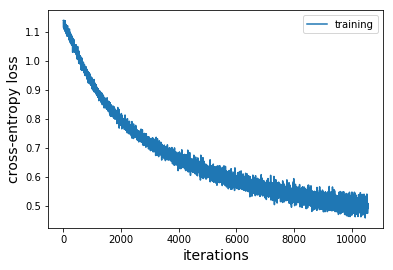

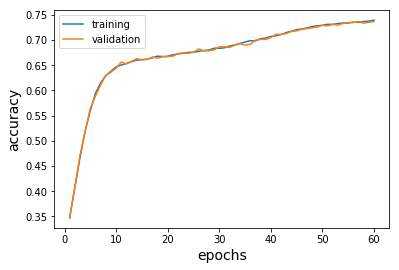

In [25]:
trainingMetrics(hist)

Note how the training and validation accuracy are tracking one another almost exactly--Nikhil suggested that we increase the number of filters in out convolutional layers (since before we only had one filter for each preprocessing layer) 

In [4]:
"""
Only had one filter in the intial preprocessing CNN layers; increasing this to 32 filters.  
"""
layer0_params_2 = [32, 3, 3, 1, 1]
layer0_reduce_2 = [1, 3, 93, 1, 1] # ---> Downsampling with one filter at the end

layer1_params_2 = [32, 3, 3, 1, 1]
layer1_reduce_2 = [1, 12, 9, 1, 1] # ---> Downsampling with one filter 

layer2_params_2 = [32, 3, 3, 1, 1]
layer2_reduce_2 = [1, 12, 3, 1, 1] # --> downsampling with one filter 

rnn_params_2 = [18, 18, 1]

layer3_params_2 = [32, 3, 3, 1, 1]

fc_params_2 = [576, 150, 100, 50, 3, 0.5]

In [47]:
rnn_model_2 = rnn_2dCNN(layer0_params_2, layer0_reduce_2, layer1_params_2, layer1_reduce_2, layer2_params_2, layer2_reduce_2, rnn_params_2, layer3_params_2, fc_params_2)

optimizer_2 = optim.Adam(rnn_model_2.parameters(), lr=1e-5)

hist_2, bestModel_2 = train(loader_train, loader_val, rnn_model_2, optimizer_2, epochs=30, returnBest=True)


Epoch 1/30:
Iteration 0, loss = 1.1604
cuda
Got 10086 / 30000 correct (33.62)

Iteration 100, loss = 1.0437
cuda
Got 12250 / 30000 correct (40.83)

cuda
Got 82443 / 180000 correct (45.80)
cuda
Got 13665 / 30000 correct (45.55)

Epoch 2/30:
Iteration 0, loss = 1.0014
cuda
Got 13740 / 30000 correct (45.80)

Iteration 100, loss = 0.9816
cuda
Got 15258 / 30000 correct (50.86)

cuda
Got 98771 / 180000 correct (54.87)
cuda
Got 16447 / 30000 correct (54.82)

Epoch 3/30:
Iteration 0, loss = 0.9636
cuda
Got 16457 / 30000 correct (54.86)

Iteration 100, loss = 0.9386
cuda
Got 17781 / 30000 correct (59.27)

cuda
Got 111669 / 180000 correct (62.04)
cuda
Got 18461 / 30000 correct (61.54)

Epoch 4/30:
Iteration 0, loss = 0.9302
cuda
Got 18618 / 30000 correct (62.06)

Iteration 100, loss = 0.8946
cuda
Got 19360 / 30000 correct (64.53)

cuda
Got 119403 / 180000 correct (66.33)
cuda
Got 20009 / 30000 correct (66.70)

Epoch 5/30:
Iteration 0, loss = 0.8929
cuda
Got 19918 / 30000 correct (66.39)

Iterat

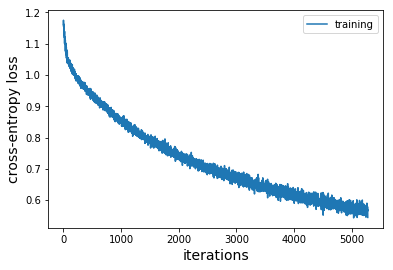

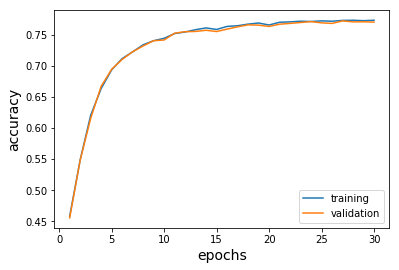

In [48]:
trainingMetrics(hist_2)

In [2]:
# get ROC curves for model 
for node in range(3):
    g_eff, pi_eff, e_eff = sigBkgEff(bestModel_2, loader_val, node)
    
    # Plot the ROC curve using node as the signal and the other two as the bkg
    if node == 0:
        plotROC([g_eff, g_eff], [pi_eff, e_eff], ['$\pi^+$ rej', '$e^+$ rej'], title='$\gamma$ signal')
    if node == 1:
        plotROC([pi_eff, pi_eff], [g_eff, e_eff], ['$\gamma$ rej', '$e^+$ rej'], title='$\pi^+$ signal')
    elif node == 2:
        plotROC([e_eff, e_eff], [g_eff, pi_eff], ['$\gamma$ rej', '$\pi^+$ rej'], title='$e^+$ signal')

NameError: name 'bestModel_2' is not defined

In [8]:
#rnn_pres = rnn_2dCNN(layer0_params_2, layer0_reduce_2, layer1_params_2, layer1_reduce_2, layer2_params_2, layer2_reduce_2, rnn_params_2, layer3_params_2, fc_params_2)

rnn_pres =torch.load('../models/rnn_model.pth.tar')

In [11]:
# get ROC curves for model 
for node in range(3):
    g_eff, pi_eff, e_eff = sigBkgEff(rnn_pres, loader_val, node)
    
    # Plot the ROC curve using node as the signal and the other two as the bkg
    if node == 0:
        plotROC([g_eff, g_eff], [pi_eff, e_eff], ['$\pi^+$ rej', '$e^+$ rej'], title='$\gamma$ signal')
    if node == 1:
        plotROC([pi_eff, pi_eff], [g_eff, e_eff], ['$\gamma$ rej', '$e^+$ rej'], title='$\pi^+$ signal')
    elif node == 2:
        plotROC([e_eff, e_eff], [g_eff, pi_eff], ['$\gamma$ rej', '$\pi^+$ rej'], title='$e^+$ signal')

TypeError: 'collections.OrderedDict' object is not callable